In [2]:
import pandas
from scipy.io import arff
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
from dl85 import DL85Predictor
from dl85 import DL85Classifier
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
import MyCode.utils as utils
import graphviz


In [3]:
pd.set_option('max_columns', None)
FILE_NAME = "relab_Lawsuit"

data = arff.loadarff('datasets2/census_income.arff')
df = pd.DataFrame(data[0])
str_df = df.select_dtypes([np.object])
str_df = str_df.stack().str.decode('utf-8').unstack()
for col in str_df:
    df[col] = str_df[col]
df

/tmp/ipykernel_48169/2746773062.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  str_df = df.select_dtypes([np.object])


,sex,workclass,education,education-num,marital-status,occupation,relationship,race,age,capital-gain,capital-loss,hours-per-week,native-country,income_class
0,Male,Private,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,25.0,0.0,0.0,40.0,United-States,<=50K
1,Male,Private,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,38.0,0.0,0.0,50.0,United-States,<=50K
2,Male,Local-gov,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,28.0,0.0,0.0,40.0,United-States,>50K
3,Male,Private,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,44.0,7688.0,0.0,40.0,United-States,>50K
4,Female,?,Some-college,10.0,Never-married,?,Own-child,White,18.0,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,Female,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,39.0,0.0,0.0,36.0,United-States,<=50K
16277,Male,?,HS-grad,9.0,Widowed,?,Other-relative,Black,64.0,0.0,0.0,40.0,United-States,<=50K
16278,Male,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,38.0,0.0,0.0,50.0,United-States,<=50K
16279,Male,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,44.0,5455.0,0.0,40.0,United-States,<=50K


In [4]:
for i in range(0,len(df)):
    if str(df.at[i, "sex"]) == "Male":
        df.at[i, "sex"] = 0
    elif str(df.at[i, "sex"]) == "Female":
        df.at[i, "sex"] = 1

    if str(df.at[i, "income_class"]) == "<=50K":
        df.at[i, "income_class"] = 0
    elif str(df.at[i, "income_class"]) == ">50K":
        df.at[i, "income_class"] = 1

for col in df.columns:
    df = df[ df[col] != "?" ]

col = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']
df = df.drop(['education-num', 'age', 'capital-gain', 'capital-loss', 'hours-per-week'], axis=1)
#df = df.drop(['native-country'], axis=1)
df = pd.get_dummies(df, columns=col, drop_first=True)
df


,sex,income_class,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
16276,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
16278,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
16279,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0

In [5]:
male = df.loc[df['sex'] == 0]
female = df.loc[df['sex'] == 1]
male = male.sample(frac=0.1, random_state=1)
female = female.sample(frac=0.2, random_state=1)
print(f'{len(male)} {len(female)}')

df = pd.concat([male, female])
df


1015 983


,sex,income_class,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
4158,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
14727,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6300,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
422,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2554,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13083,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
12088,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7076,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
13544,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0

In [6]:
X = df.loc[:, ~df.columns.isin(['income_class', 'sex'])]
y = pd.to_numeric(df['income_class'])
sensitive = df['sex']

In [7]:
X_train, X_test, y_train, y_test, sensitive_train, sensitive_test = utils.train_test_split(1, X, y, sensitive)

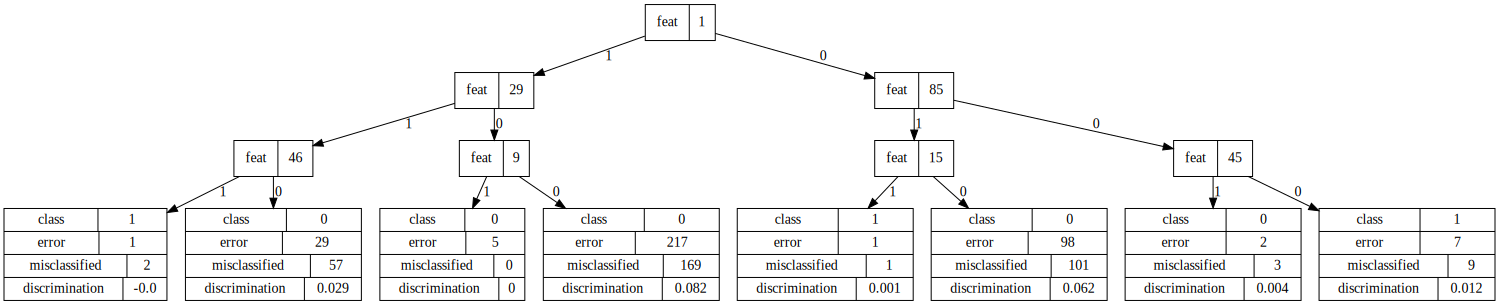

In [8]:
clf = DL85Classifier(max_depth=3, error_function=lambda tids: utils.error(list(tids), 10, y_train, sensitive_train), min_sup=1, time_limit=600)
clf = DL85Classifier(max_depth=3, error_function=lambda tids: utils.misclassified(list(tids), y), min_sup=5, time_limit=600)
clf.fit(X_train, list(y_train))
utils.tree_upgrade(clf.tree_, y_train, sensitive_train)

dot = utils.export_graphviz(clf)
graph = graphviz.Source(dot, format="png")
graph.render("plots/"+FILE_NAME+"tree")
graphviz.Source(dot)

In [9]:
y_pred_train = clf.predict(X_train)
discrimation_train = round(utils.discrimination(y_pred_train, sensitive_train), 4)
print("Discrimination of classifier on train", round(utils.discrimination(sensitive_train, y_pred_train), 4))

Discrimination of classifier on train 0.2123


In [10]:
from pprint import pprint

pprint(clf.tree_)

{'feat': 1,
 'left': {'feat': 29,
          'left': {'feat': 46,
                   'left': {'discrimination_additive': -7.839743107297876e-05,
                            'error': 1.0,
                            'misclassified': 2,
                            'proba': [0.6, 0.4],
                            'transactions': [1283, 904, 297, 274, 1082],
                            'value': 1},
                   'proba': [0.6193548387096774, 0.38064516129032255],
                   'right': {'discrimination_additive': 0.02908544692807506,
                             'error': 29.0,
                             'misclassified': 57,
                             'proba': [0.62, 0.38],
                             'transactions': [1025,
                                              1538,
                                              1527,
                                              1028,
                                              1035,
                                              103

In [11]:
result2 = pd.DataFrame(X_train, columns = X.columns)
result2["Class"] = y_train
result2["Sensitive"] = sensitive_train
result2["Pred"] = y_pred_train

In [12]:
result2

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,Class,Sensitive,Pred
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1594,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1595,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1596,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0

In [13]:
def compute_disc_t(dataset):
    w2 = len(dataset[(dataset['Sensitive'] == 0) & (dataset['Class'] == 0) & (dataset['Pred'] == 1)])/len(dataset)
    x2 = len(dataset[(dataset['Sensitive'] == 0) & (dataset['Class'] == 1) & (dataset['Pred'] == 1)])/len(dataset)
    u2 = len(dataset[(dataset['Sensitive'] == 1) & (dataset['Class'] == 0) & (dataset['Pred'] == 1)])/len(dataset)
    v2 = len(dataset[(dataset['Sensitive'] == 1) & (dataset['Class'] == 1) & (dataset['Pred'] == 1)])/len(dataset)
    b       = len(dataset[(dataset['Sensitive'] == 1)  & (dataset['Class'] == 0)]) + len(dataset[(dataset['Sensitive'] == 1)  & (dataset['Class'] == 1)])/len(dataset)
    b_not   = len(dataset[(dataset['Sensitive'] == 0)  & (dataset['Class'] == 0)]) + len(dataset[(dataset['Sensitive'] == 0)  & (dataset['Class'] == 1)])/len(dataset)

    """
    w1 = len(dataset[(dataset['Sensitive'] == 0) & (dataset['Class'] == 0) & (dataset['Pred'] == 0)])/len(dataset)
    x1 = len(dataset[(dataset['Sensitive'] == 0) & (dataset['Class'] == 1) & (dataset['Pred'] == 0)])/len(dataset)
    u1 = len(dataset[(dataset['Sensitive'] == 1) & (dataset['Class'] == 0) & (dataset['Pred'] == 0)])/len(dataset)
    v1 = len(dataset[(dataset['Sensitive'] == 1) & (dataset['Class'] == 1) & (dataset['Pred'] == 0)])/len(dataset)
    print(w1+w2+x1+x2+u1+u2+v1+v2)
    """

    return ((w2+x2)/b_not) - ((u2+v2)/b)
compute_disc_t(result2)

1.5689890555755887e-05

In [14]:
utils.discrimination(y_pred_train, sensitive_train)

0.015149519580542383

In [15]:
class Leaf:
    def __init__(self, path, u, v, w, x):
        self.path = path
        self.acc=None
        self.disc=None
        self.ratio=None
        self.u = u
        self.v = v
        self.w = w
        self.x = x

    def accuracy(self, n_one, n_zero):
        n = self.u + self.w
        p = self.v + self.x
        if n<=p :
            self.acc = n - p
            self.disc = (self.u+self.v)/n_one - (self.w+self.x)/n_zero
            self.ratio = self.disc/self.acc
        else:
            self.acc = p - n
            self.disc = -(self.u+self.v)/n_one + (self.w+self.x)/n_zero
            self.ratio = self.disc/self.acc

    def __str__(self):
        return f"Path: {self.path} \naccuracy: {self.acc} \ndisc: {self.disc} \nratio: {self.ratio} \ncontigency: \n{[self.u, self.v]}\n{[self.w, self.x]}"
    def __repr__(self):
        return f"{self.path}"

In [16]:
import copy

def relab1(tree, y, sensitive, n_zero, n_one, leafs, lenght, leaftuple= tuple()):
    if 'feat' in tree:
        tmp= leaftuple + ((tree['feat'], 'left'),)
        relab1(tree['left'], y, sensitive, n_zero, n_one, leafs, lenght, tmp)
        tmp= leaftuple + ((tree['feat'], 'right'),)
        relab1(tree['right'], y, sensitive, n_zero, n_one, leafs, lenght, tmp)
    else:
        tree["u"] = 0
        tree["v"] = 0
        tree["w"] = 0
        tree["x"] = 0
        for id in tree["transactions"]:
            if sensitive[id] == 1 and tree["value"] == 0:
                tree["u"] += 1
            if sensitive[id] == 1 and tree["value"] == 1:
                tree["v"] += 1
            if sensitive[id] == 0 and tree["value"] == 0:
                tree["w"] += 1
            if sensitive[id] == 0 and tree["value"] == 1:
                tree["x"] += 1
        n = (tree["u"]+tree["w"])
        p = (tree["v"]+tree["x"])
        if n<=p :
            tree["acc"] = n - p
            tree["disc"] = (tree["u"]+tree["v"])/n_one - (tree["w"]+tree["x"])/n_zero
        else:
            tree["acc"] = p - n
            tree["disc"] = -(tree["u"]+tree["v"])/n_one + (tree["w"]+tree["x"])/n_zero
        if tree["disc"] < 0:
            t = dict()
            t['tree'] = tree
            t['path'] = leaftuple
            leaf = Leaf(leaftuple, tree["u"]/lenght, tree["v"]/lenght, tree["w"]/lenght, tree["x"]/lenght)
            leaf.accuracy(n_one, n_zero)
            leafs.add(leaf)
cnt = np.unique(sensitive, return_counts=True)[1]


In [17]:
leafs = set()
relab1(clf.tree_, y_train, sensitive_train, cnt[0], cnt[1], leafs, len(y_train))
print(utils.sum_elem_tree(clf.tree_, "disc",  s=list(), bool=False))
pprint(clf.tree_)

0.11937920009621687
{'feat': 1,
 'left': {'feat': 29,
          'left': {'feat': 46,
                   'left': {'acc': -5,
                            'disc': 0.0010814386441425415,
                            'discrimination_additive': -7.839743107297876e-05,
                            'error': 1.0,
                            'misclassified': 2,
                            'proba': [0.6, 0.4],
                            'transactions': [1283, 904, 297, 274, 1082],
                            'u': 0,
                            'v': 3,
                            'value': 1,
                            'w': 0,
                            'x': 2},
                   'proba': [0.6193548387096774, 0.38064516129032255],
                   'right': {'acc': -150,
                             'disc': -0.022430580960064936,
                             'discrimination_additive': 0.02908544692807506,
                             'error': 29.0,
                             'misclassified': 5

In [18]:
for leaf in leafs:
    print(leaf)
    print()

Path: ((1, 'right'), (85, 'left'), (15, 'left')) 
accuracy: -0.0031289111389236545 
disc: -1.8295323539061183e-06 
ratio: 0.0005847185403083954 
contigency: 
[0.0, 0.0006257822277847309]
[0.0, 0.0025031289111389237]

Path: ((1, 'left'), (29, 'right'), (9, 'left')) 
accuracy: -0.007509386733416771 
disc: -1.3735604576806298e-06 
ratio: 0.00018291246761447056 
contigency: 
[0.004380475594493116, 0.0]
[0.0031289111389236545, 0.0]

Path: ((1, 'right'), (85, 'right'), (45, 'right')) 
accuracy: -0.011889862327909888 
disc: -6.701595201058236e-06 
ratio: 0.0005636394279626874 
contigency: 
[0.0, 0.0025031289111389237]
[0.0, 0.009386733416770964]

Path: ((1, 'left'), (29, 'right'), (9, 'right')) 
accuracy: -0.6539424280350438 
disc: -1.361957321394287e-05 
ratio: 2.0826868895579625e-05 
contigency: 
[0.3285356695869837, 0.0]
[0.32540675844806005, 0.0]

Path: ((1, 'left'), (29, 'left'), (46, 'right')) 
accuracy: -0.09386733416770963 
disc: -1.4036658923695215e-05 
ratio: 0.00014953720640043303 

In [19]:
disc_t = utils.discrimination(y_pred_train, sensitive_train)
disc_t = compute_disc_t(result2)
def rem_disc(L, e):
    s = 0
    for leaf in L:
        print(leaf.disc)
        if leaf.disc < e:
            s += leaf.disc
    return disc_t+s

def relab(leafs, e):
    I = list()
    for leaf in leafs:
        if leaf.disc < 0:
            I.append(leaf)
    L = set()
    print(rem_disc(L, e))
    while rem_disc(L, e) > e:
        best_l = I[0]
        for leaf in I:
            if leaf.ratio > best_l.ratio:
                best_l = leaf
        L.add(best_l)
        I.remove(best_l)
        leafs.remove(best_l)
        print(rem_disc(L, e))
    return L
relab(leafs, 1)

1.5689890555755887e-05


set()

In [20]:
l = Leaf(None, 1/20, 1/20, 1/20, 0)
l.accuracy(1/2,1/2)
print(l)

Path: None 
accuracy: -0.05 
disc: -0.1 
ratio: 2.0 
contigency: 
[0.05, 0.05]
[0.05, 0]
